In [1]:
import os
os.getcwd()

'/Users/obadaessa/Desktop/Python Codes'

In [2]:
os.chdir('/Users/obadaessa/Desktop/Data Sets')

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
airdata = pd.read_csv('airquality.csv')

In [5]:
airdata.apply(lambda x: sum(x.isnull()), axis=0)

 Ozone     37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [6]:
airdata

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [7]:
from sklearn.impute import SimpleImputer # Slight modification from recording
imp = SimpleImputer(missing_values=py.nan, strategy='mean') # Here as well

In [8]:
features = airdata.iloc[:,:].values
features

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [9]:
imp.fit(features[:,:])
features[:,:] = imp.fit_transform(features[:,:])

In [10]:
cleandata = pd.DataFrame(features)

In [11]:
cleandata.columns=['Ozone','Solar.R', 'Wind', 'Temp', 'Month', 'Day']

In [12]:
cleandata.apply(lambda x: sum(x.isnull()), axis=0)

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [13]:
cleandata

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


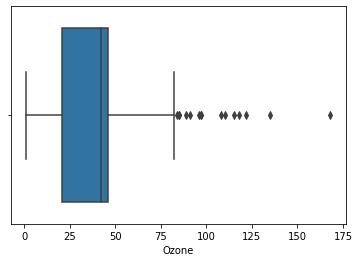

In [14]:
import seaborn as sns
sns.boxplot(x=cleandata['Ozone']) ####### Ozone

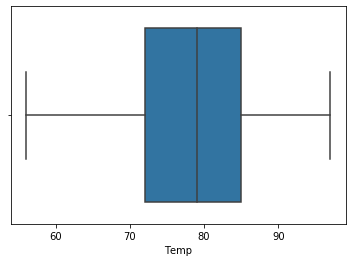

In [15]:
sns.boxplot(x=cleandata['Temp']) ###### Temps

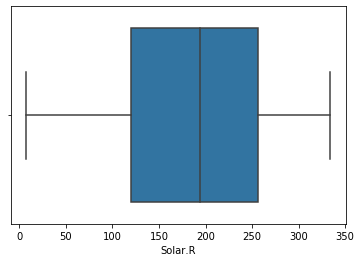

In [16]:
sns.boxplot(x=cleandata['Solar.R']) ######## Solar R

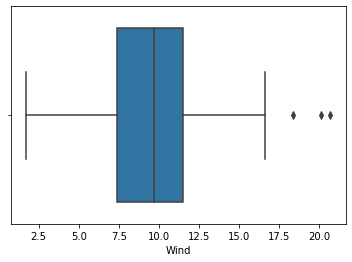

In [17]:
sns.boxplot(x=cleandata['Wind']) ###### Wind

In [18]:
from scipy import stats

z = py.abs(stats.zscore(cleandata))
print(z)

[[3.94871361e-02 4.64056617e-02 7.28332230e-01 1.15348973e+00
  1.41191599e+00 1.65847407e+00]
 [2.14315677e-01 7.74833927e-01 5.57463590e-01 6.23507964e-01
  1.41191599e+00 1.54509314e+00]
 [1.05349268e+00 4.21244659e-01 7.52529314e-01 4.11515256e-01
  1.41191599e+00 1.43171220e+00]
 [8.43698426e-01 1.44935663e+00 4.39270141e-01 1.68347150e+00
  1.41191599e+00 1.31833127e+00]
 [0.00000000e+00 0.00000000e+00 1.23665713e+00 2.31944963e+00
  1.41191599e+00 1.20495033e+00]
 [4.94041344e-01 0.00000000e+00 1.40752577e+00 1.25948609e+00
  1.41191599e+00 1.09156940e+00]
 [6.68869885e-01 1.28967115e+00 3.86594951e-01 1.36548244e+00
  1.41191599e+00 9.78188462e-01]
 [8.08732718e-01 9.91549929e-01 1.09426659e+00 2.00146056e+00
  1.41191599e+00 8.64807526e-01]
 [1.19335551e+00 1.90403836e+00 2.88838731e+00 1.78946786e+00
  1.41191599e+00 7.51426591e-01]
 [0.00000000e+00 9.20300832e-02 3.86594951e-01 9.41497026e-01
  1.41191599e+00 6.38045656e-01]
 [1.22832122e+00 0.00000000e+00 8.70722763e-01 4.1

In [19]:
th = 3
print(py.where(z>3))

(array([ 47,  61, 116]), array([2, 0, 0]))


In [20]:
Q1 = cleandata.quantile(0.25)
Q3 = cleandata.quantile(0.75)
IQR = Q3-Q1
IQR

Ozone       25.0
Solar.R    136.0
Wind         4.1
Temp        13.0
Month        2.0
Day         15.0
dtype: float64

In [21]:
cleandata = cleandata[(z<3).all(axis=1)]
cleandata

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [22]:
cleandata = cleandata[~((cleandata<(Q1 -1.5*IQR)) | (cleandata >(Q3+1.5*IQR))).any(axis=1)]
cleandata

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [23]:
ozone = cleandata['Ozone']
temp = cleandata['Temp']
ozonemean = ozone.mean()
ozonemean

35.51692209450831

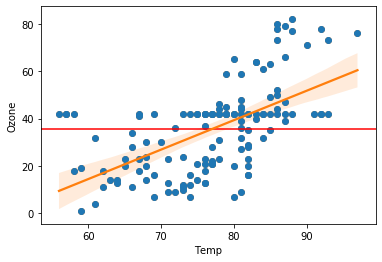

In [24]:
plt.plot(temp, ozone, 'o')
plt.xlabel('Temperature')
plt.ylabel('Ozone')
plt.axhline(ozonemean, color='r', linestyle='-')
sns.regplot(x= 'Temp', y= 'Ozone', data=cleandata)

In [25]:
x = temp
y = ozone
x, y

(0      67.0
 1      72.0
 2      74.0
 3      62.0
 4      56.0
        ... 
 148    70.0
 149    77.0
 150    75.0
 151    76.0
 152    68.0
 Name: Temp, Length: 135, dtype: float64,
 0      41.00000
 1      36.00000
 2      12.00000
 3      18.00000
 4      42.12931
          ...   
 148    30.00000
 149    42.12931
 150    14.00000
 151    18.00000
 152    20.00000
 Name: Ozone, Length: 135, dtype: float64)

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(temp, ozone, test_size = 0.4, random_state=1)

In [27]:
xtrain, xtest, ytrain, ytest

(110    78.0
 130    78.0
 86     82.0
 83     82.0
 11     69.0
        ... 
 79     87.0
 147    63.0
 88     88.0
 80     85.0
 40     87.0
 Name: Temp, Length: 81, dtype: float64,
 45     79.0
 39     90.0
 105    80.0
 5      66.0
 73     81.0
 125    93.0
 60     83.0
 19     62.0
 57     73.0
 138    78.0
 77     82.0
 137    71.0
 48     65.0
 64     84.0
 101    92.0
 133    81.0
 36     79.0
 87     86.0
 143    64.0
 18     68.0
 52     76.0
 104    82.0
 49     73.0
 34     84.0
 4      56.0
 146    69.0
 136    71.0
 38     87.0
 59     77.0
 117    86.0
 43     82.0
 150    75.0
 141    68.0
 67     88.0
 74     91.0
 13     68.0
 2      74.0
 42     92.0
 129    80.0
 6      65.0
 91     81.0
 112    77.0
 94     82.0
 107    77.0
 145    81.0
 58     80.0
 92     81.0
 111    78.0
 50     76.0
 63     81.0
 139    67.0
 55     75.0
 81     74.0
 103    86.0
 Name: Temp, dtype: float64,
 110    31.00000
 130    23.00000
 86     20.00000
 83     42.12931
 11     16.00000


In [28]:
xtrain = xtrain.values.reshape((-1,1))

In [29]:
xtrain

array([[78.],
       [78.],
       [82.],
       [82.],
       [69.],
       [82.],
       [85.],
       [76.],
       [93.],
       [73.],
       [84.],
       [68.],
       [76.],
       [58.],
       [80.],
       [92.],
       [79.],
       [81.],
       [86.],
       [76.],
       [77.],
       [82.],
       [73.],
       [66.],
       [80.],
       [78.],
       [81.],
       [86.],
       [77.],
       [57.],
       [77.],
       [86.],
       [75.],
       [76.],
       [61.],
       [84.],
       [62.],
       [70.],
       [67.],
       [76.],
       [77.],
       [87.],
       [87.],
       [69.],
       [83.],
       [83.],
       [67.],
       [72.],
       [85.],
       [57.],
       [83.],
       [82.],
       [59.],
       [74.],
       [73.],
       [58.],
       [86.],
       [79.],
       [79.],
       [75.],
       [88.],
       [76.],
       [85.],
       [81.],
       [76.],
       [64.],
       [74.],
       [78.],
       [97.],
       [66.],
       [81.],
      

In [30]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
result = model.fit(xtrain, ytrain)

In [31]:
accuracy = model.score(xtrain, ytrain)
print('Acc: ', accuracy)
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

Acc:  0.33353179350266293
intercept:  -57.01182427164724
slope:  [1.22080817]


In [32]:
xtest = xtest.values.reshape((-1,1))

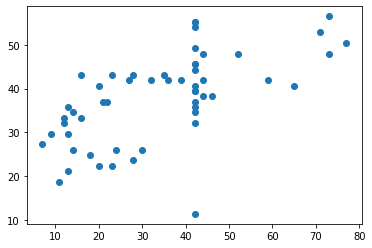

In [33]:
predections = model.predict(xtest)
plt.scatter(ytest,predections)

In [34]:
xnew = [[60]]
ynew = model.predict(xnew)
print("New temp: ", xnew, " predicted ozone: ", ynew)

New temp:  [[60]]  predicted ozone:  [16.23666613]


In [35]:
xnew = [[40]]
ynew = model.predict(xnew)
print("New temp: ", xnew, " predicted ozone: ", ynew)

New temp:  [[40]]  predicted ozone:  [-8.17949733]


In [36]:
# Evaluating the models

from sklearn.metrics import mean_squared_error,r2_score

ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)

In [37]:
#Model evaluation for training set

rmsetrain = (py.sqrt(mean_squared_error(ytrain, ytrainpred)))
r2train = r2_score(ytrain, ytrainpred)

print('RMSE is ', rmsetrain) # We want this to be higher than the test
print('R2 score is ', r2train)

rmsetest = (py.sqrt(mean_squared_error(ytest, ytestpred)))
r2test = r2_score(ytest, ytestpred)

print("\nRMSE test is ", rmsetest) # This has to be lower than the training
print("R2 test score is ", r2test)

RMSE is  15.746210502643356
R2 score is  0.33353179350266293

RMSE test is  14.259947995528782
R2 test score is  0.3422342596546806


Text(0, 0.5, 'Ozone')

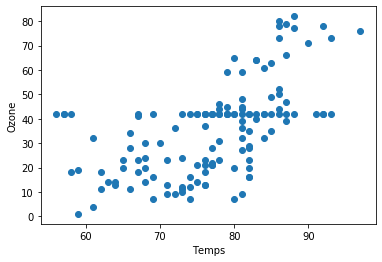

In [38]:
# Plotting values

plt.scatter(x, y)
plt.xlabel('Temps')
plt.ylabel('Ozone')

In [39]:
x = x.values.reshape(-1,1)
y_predicted=model.predict(x)

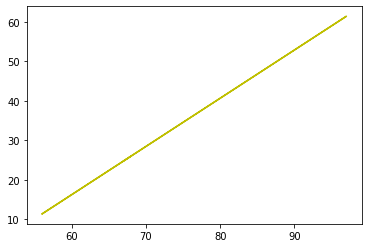

In [40]:
plt.plot(x, y_predicted, color='y')
plt.show()

# Multiple Linear Regression

In [51]:
x = cleandata[['Solar.R','Wind']] # Solar R + Wind (temp, pressure)
y = cleandata['Ozone'] # Ozone (orf)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state = 1)

In [53]:
import statsmodels.api as sm

model1 = sm.OLS(y,x).fit()
predections = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              188.9
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    1.36e-39
Time:                        17:51:12   Log-Likelihood:                         -599.10
No. Observations:                 135   AIC:                                      1202.
Df Residuals:                     133   BIC:                                      1208.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.1281      0.017      7.392      0.000       0.094       0.162
Wind           0.8764      0.332      2.641      0.009       0.220       1.533
==============================================================================
Omnibus:                        2.070   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                2.116
Skew:                           0.286   Prob(JB):                        0.347
Kurtosis:                       2.777   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(temp, ozone, test_size = 0.4, random_state=1)

In [56]:
xtrain

110    78.0
130    78.0
86     82.0
83     82.0
11     69.0
       ... 
79     87.0
147    63.0
88     88.0
80     85.0
40     87.0
Name: Temp, Length: 81, dtype: float64

In [58]:
features = xtrain.iloc[:].values

In [59]:
features

array([78., 78., 82., 82., 69., 82., 85., 76., 93., 73., 84., 68., 76.,
       58., 80., 92., 79., 81., 86., 76., 77., 82., 73., 66., 80., 78.,
       81., 86., 77., 57., 77., 86., 75., 76., 61., 84., 62., 70., 67.,
       76., 77., 87., 87., 69., 83., 83., 67., 72., 85., 57., 83., 82.,
       59., 74., 73., 58., 86., 79., 79., 75., 88., 76., 85., 81., 76.,
       64., 74., 78., 97., 66., 81., 59., 72., 71., 61., 67., 87., 63.,
       88., 85., 87.])

In [60]:
labels = ytrain.iloc[:].values

In [61]:
labels

array([31.        , 23.        , 20.        , 42.12931034, 16.        ,
       29.        , 42.12931034, 23.        , 42.12931034, 11.        ,
       32.        , 20.        , 37.        , 42.12931034,  7.        ,
       78.        , 45.        , 42.12931034, 50.        , 13.        ,
       42.12931034, 16.        , 10.        , 34.        , 42.12931034,
       42.12931034, 45.        , 80.        , 21.        , 42.12931034,
       28.        , 42.12931034, 42.12931034, 42.12931034, 32.        ,
       61.        , 18.        , 30.        , 42.12931034, 18.        ,
       42.12931034, 47.        , 66.        , 42.12931034, 64.        ,
       64.        , 41.        , 36.        , 49.        , 42.12931034,
       40.        , 42.12931034, 19.        ,  7.        , 24.        ,
       18.        , 78.        , 59.        , 42.12931034, 21.        ,
       42.12931034, 21.        , 35.        , 48.        , 42.12931034,
       14.        , 42.12931034, 42.12931034, 76.        , 11.  

In [62]:
x, y = features, labels

In [65]:
from sklearn import linear_model as lm

model = lm.LinearRegression()
results = model.fit(x.reshape(-1,1),y)
predictions = model.predict(x.reshape(-1,1))

In [67]:
accuracy = model.score(x.reshape(-1,1),y)
print(accuracy)

0.33353179350266293


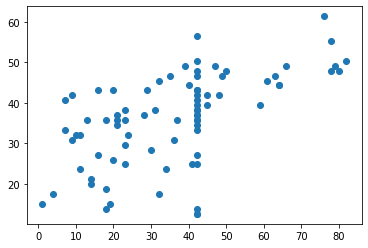

In [68]:
plt.scatter(y, predictions)